In [144]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from numpy import cos
from numpy import e
from numpy import exp
from numpy import pi
from numpy import sin
from numpy import sqrt

# incrementar a cada grafico
figure = 0


# função esferica a otimizar
def f_esfera(X):
    return sum(y ** 2 for y in X)


# função gradiente da funcao esferica
def grad_f_esfera(X):
    return np.array([2 * y for y in X])


# função esferica a otimizar
def f_ackley(X):
    x = X[0]
    y = X[1]
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x ** 2 + y ** 2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20


# função gradiente da funcao esferica
def grad_f_ackley(X):
    x = X[0]
    y = X[1]
    xn = (2.828 * x / (sqrt(x ** 2 + y ** 2))) * exp(-0.2 * sqrt(0.5 * (x ** 2 + y ** 2))) + pi * exp(
        0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) * sin(2 * pi * x)
    yn = (2.828 * y / (sqrt(x ** 2 + y ** 2))) * exp(-0.2 * sqrt(0.5 * (x ** 2 + y ** 2))) + pi * exp(
        0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) * sin(2 * pi * y)
    return np.array([xn, yn])


# para gerar novas figuras para os graficos
def new_figure():
    global figure
    figure += 1
    return figure


# plotar gráfico superficie
def surf_plot(X, Y, Z):
    plt.figure(new_figure())
    axes = plt.axes(projection='3d')
    axes.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)


# plotar gráfico linhas
def line_plot(X, Y, Z, title=""):
    plt.figure(new_figure())
    axes = plt.axes(projection='3d')
    axes.plot(X, Y, Z)
    plt.title(title)
    plt.margins(0.5)
    plt.xlim([-30, 30])
    plt.ylim([-30, 30])


# funcao gradiente
def gradient_descent(x_0, func, grad, precision=0.000001, learning_rate=0.001, max_iter=10000):
    x_new = x_0
    res = []
    for i in range(max_iter):
        x_old = x_new
        x_new = x_old - learning_rate * grad(x_old)
        f_x_new = func(x_new)
        f_x_old = func(x_old)
        res.append([x_new, f_x_new])
        if abs(f_x_new - f_x_old) < precision:
            return np.array(res, dtype=object)
    return np.array(res, dtype=object)


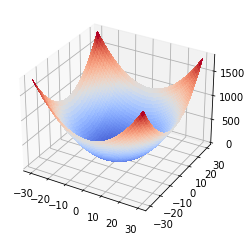

In [145]:
# superficie geral da esferica
X = np.arange(-30, 30, 0.1)
Y = np.arange(-30, 30, 0.1)
X, Y = np.meshgrid(X, Y)
Z = np.array(X ** 2 + Y ** 2)

surf_plot(X, Y, Z)


C:\Users\taian\.virtualenvs\MATF48-P-XBEAxE\lib\site-packages\pandas\core\dtypes\cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


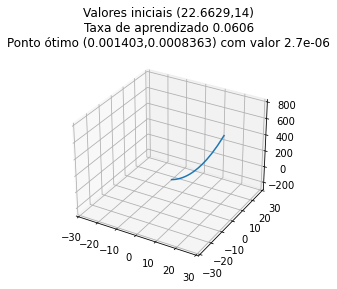

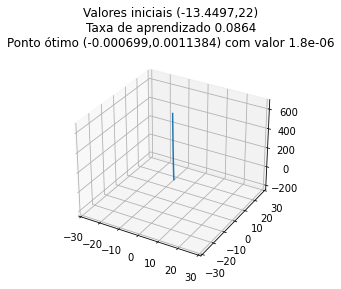

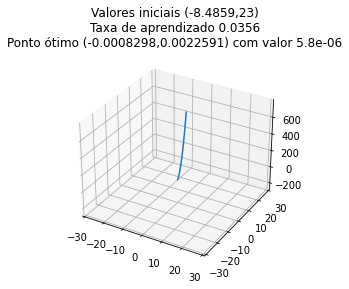

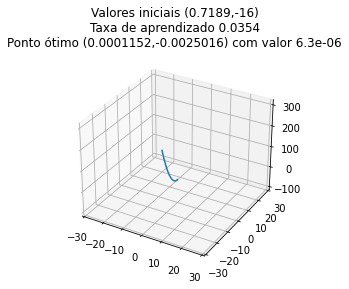

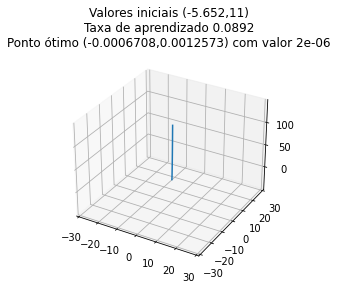

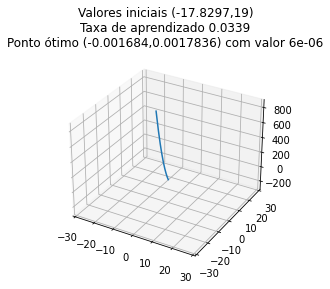

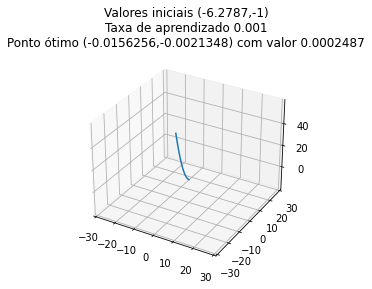

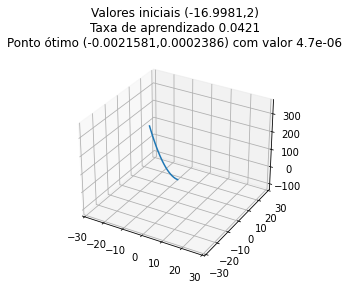

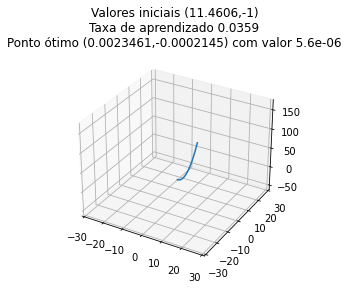

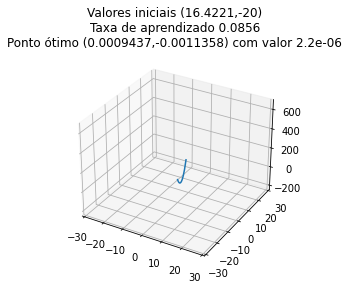

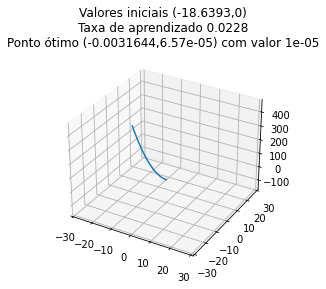

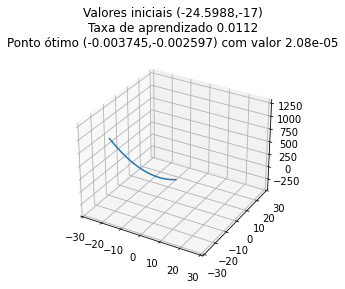

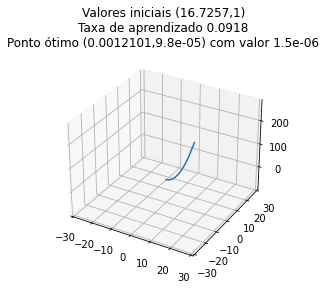

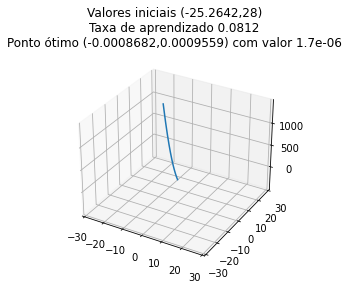

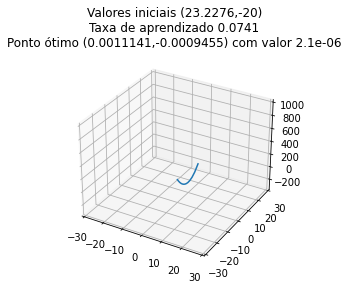

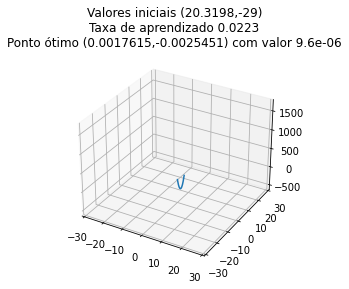

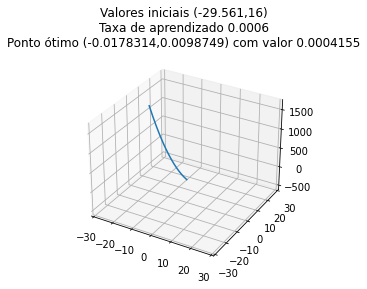

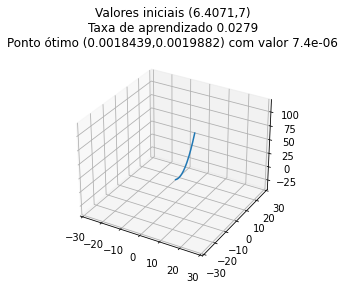

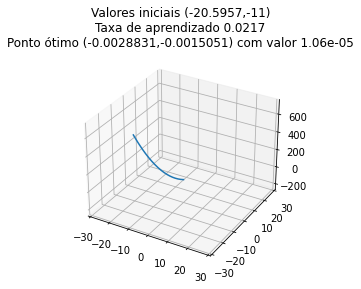

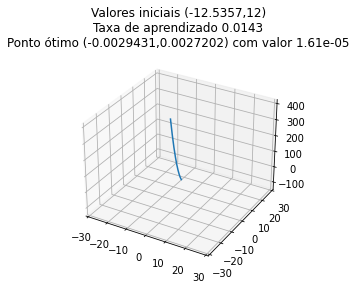

In [146]:
# calculos para funcao esferica
schema = {
    "x0": [],
    "taxa": [],
    "x": [],
    "y": [],
    "z": [],
}
resultados_esferica = pd.DataFrame(schema)
for i in range(20):
    x0 = np.random.random_sample(2) * 60 - 30
    taxa = round(np.random.random_sample() * 0.1, 4)

    title = f"Valores iniciais ({round(x0[0], 4)},{round(x0[1], )})\nTaxa de aprendizado {taxa}\n"

    result = gradient_descent(x0, f_esfera, grad_f_esfera, learning_rate=taxa)

    X = [x[0][0] for x in result[:, 0:1]]
    Y = [x[0][1] for x in result[:, 0:1]]
    Z = result[:, 1]

    xf = X[-1]
    yf = Y[-1]
    zf = Z[-1]

    subtitle = f"Ponto ótimo ({round(xf, 7)},{round(yf, 7)}) com valor {round(zf, 7)}"

    list_row = [x0, taxa, xf, yf, zf]
    resultados_esferica.loc[len(resultados_esferica)] = list_row

    line_plot(X, Y, Z, title + subtitle)


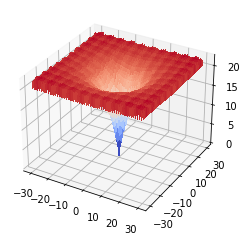

In [147]:
# superficie geral da ackley
X = np.arange(-30, 30, 0.1)
Y = np.arange(-30, 30, 0.1)
X, Y = np.meshgrid(X, Y)

Z = -20.0 * exp(-0.2 * sqrt(0.5 * (X ** 2 + Y ** 2))) - exp(0.5 * (cos(2 * pi * X) + cos(2 * pi * Y))) + e + 20

surf_plot(X, Y, Z)


C:\Users\taian\.virtualenvs\MATF48-P-XBEAxE\lib\site-packages\pandas\core\dtypes\cast.py:883: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


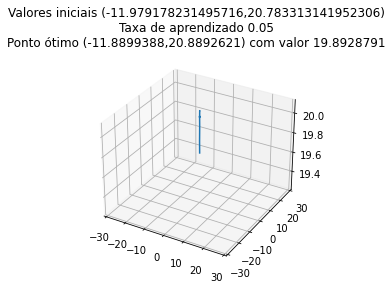

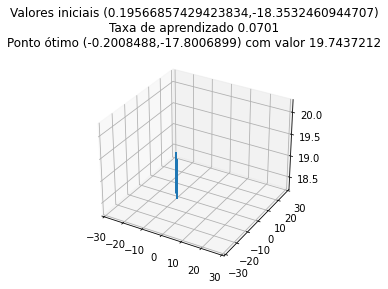

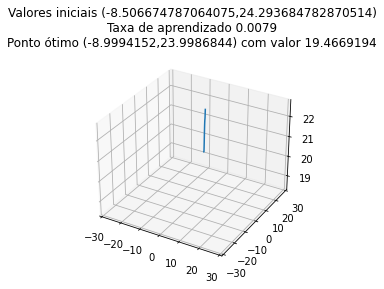

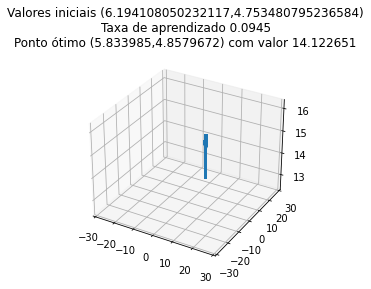

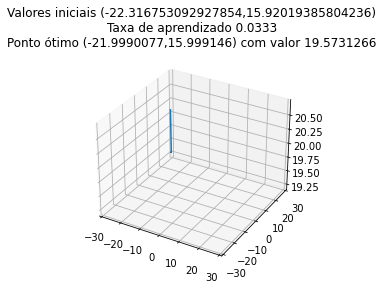

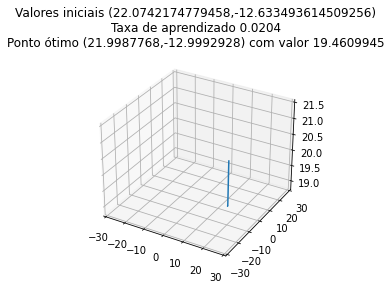

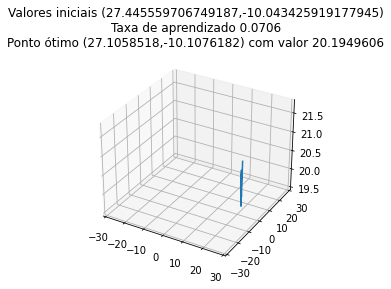

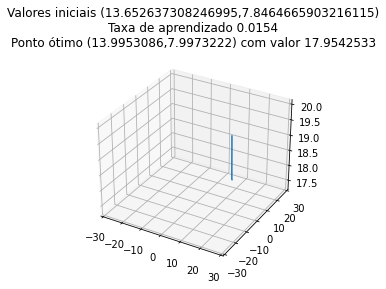

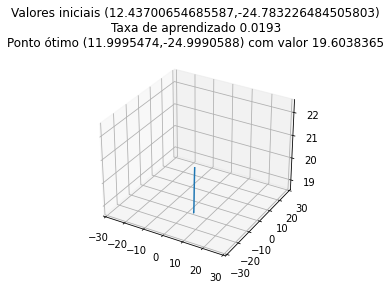

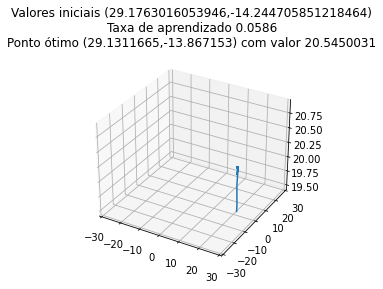

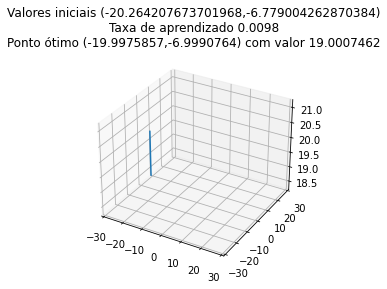

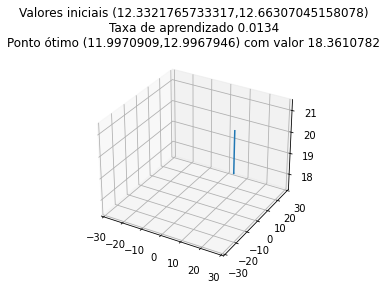

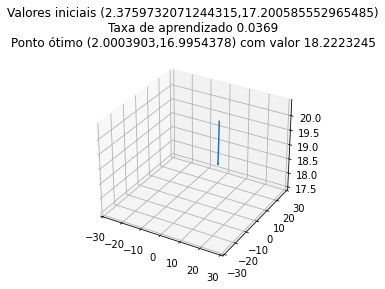

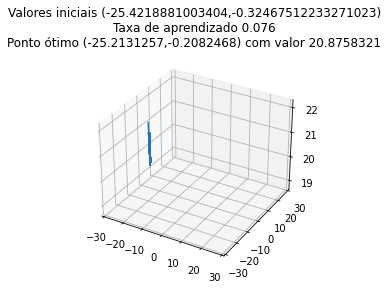

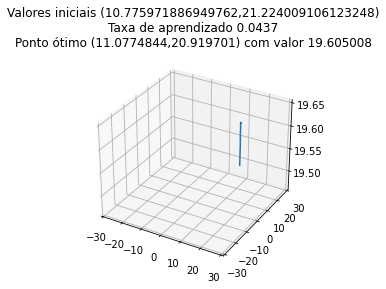

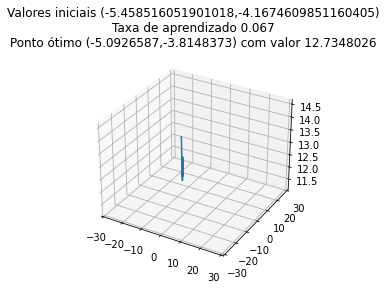

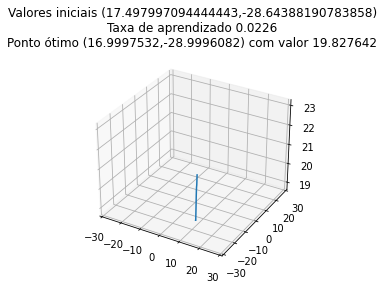

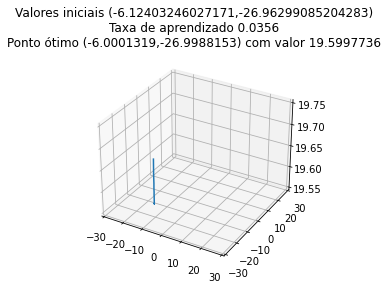

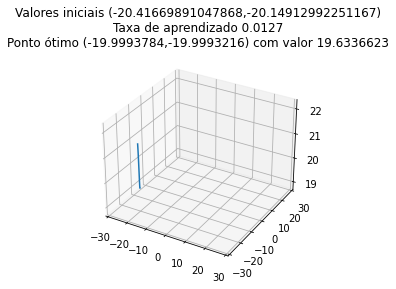

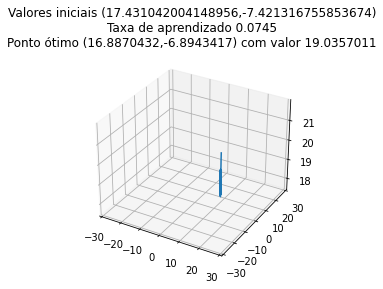

In [148]:
# calculos para funcao ackley
schema = {
    "x0": [],
    "taxa": [],
    "x": [],
    "y": [],
    "z": [],
}
resultados_ackley = pd.DataFrame(schema)
for i in range(20):
    x0 = np.random.random_sample(2) * 60 - 30
    taxa = round(np.random.random_sample() * 0.1, 4)

    title = f"Valores iniciais ({x0[0]},{x0[1]})\nTaxa de aprendizado {taxa}\n"

    result = gradient_descent(x0, f_ackley, grad_f_ackley, learning_rate=taxa)

    X = [x[0][0] for x in result[:, 0:1]]
    Y = [x[0][1] for x in result[:, 0:1]]
    Z = result[:, 1]

    xf = X[-1]
    yf = Y[-1]
    zf = Z[-1]

    subtitle = f"Ponto ótimo ({round(xf, 7)},{round(yf, 7)}) com valor {round(zf, 7)}"

    list_row = [x0, taxa, xf, yf, zf]
    resultados_ackley.loc[len(resultados_ackley)] = list_row

    line_plot(X, Y, Z, title + subtitle)


In [149]:
resultados_esferica


,x0,taxa,x,y,z
0,"[22.662916503523732, 13.507963370670467]",0.0606,0.001403,0.000836,0.000003
1,"[-13.449726831268848, 21.905751301271565]",0.0864,-0.000699,0.001138,0.000002
2,"[-8.48593470772919, 23.10229808394071]",0.0356,-0.000830,0.002259,0.000006
3,"[0.7188581450877649, -15.603576984452463]",0.0354,0.000115,-0.002502,0.000006
4,"[-5.651993352056621, 10.593979441196005]",0.0892,-0.000671,0.001257,0.000002
5,"[-17.82969246679354, 18.884137538571473]",0.0339,-0.001684,0.001784,0.000006
6,"[-6.278651553758429, -0.8577932662099066]",0.0010,-0.015626,-0.002135,0.000249
7,"[-16.998123280813704, 1.8791320312313537]",0.0421,-0.002158,0.000239,0.000005
8,"[11.460580516863715, -1.0476002602533327]",0.0359,0.002346,-0.000214,0.000006
9,"[16.42212275234653, -19.765016708465105]",0.0856,0.000944,-0.001136,0.000002


In [150]:
resultados_ackley


,x0,taxa,x,y,z
0,"[-11.979178231495716, 20.783313141952306]",0.0500,-11.889939,20.889262,19.892879
1,"[0.19566857429423834, -18.3532460944707]",0.0701,-0.200849,-17.800690,19.743721
2,"[-8.506674787064075, 24.293684782870514]",0.0079,-8.999415,23.998684,19.466919
3,"[6.194108050232117, 4.753480795236584]",0.0945,5.833985,4.857967,14.122651
4,"[-22.316753092927854, 15.92019385804236]",0.0333,-21.999008,15.999146,19.573127
5,"[22.0742174779458, -12.633493614509256]",0.0204,21.998777,-12.999293,19.460994
6,"[27.445559706749187, -10.043425919177945]",0.0706,27.105852,-10.107618,20.194961
7,"[13.652637308246995, 7.8464665903216115]",0.0154,13.995309,7.997322,17.954253
8,"[12.43700654685587, -24.783226484505803]",0.0193,11.999547,-24.999059,19.603836
9,"[29.1763016053946, -14.244705851218464]",0.0586,29.131167,-13.867153,20.545003
